# **Visualisation des données** 
Dans cette partie nous allons procéder à la visualisation des données obtenues à la fois à base du scrapping et de l'API de TMDB. Parmi les graphiques que nous souhaitons réaliser : 

-  Les nuages de mots répresentant les genres les plus populaires:
    *  dans toute la base TMDB
    *  Parmi les films nominés aux Oscars/Césars (Award_mains = 1)
    *  Parmi les films nominés aux festivals (Award_fest = 1)
 
- Les budgets de films par genre
- Les moyennes de budget par film pour les différentes compétitions - César, Oscar, Cannes et Venise
- L'évolution temporelle de budgets de films
- L'évolution temporelle des notes distribuées par les utilisatuers (trouve-t-on des films plus récents meilleurs?)
- Les notes données par les utilisateurs:
    * par catégorie de compétition
    * par décennie
    * par genre de film 



In [124]:
#installer worldcloud et matplotlib 
!pip install wordcloud 
!pip install matplotlib

In [125]:
#Imports 
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [126]:
base = pd.read_csv('../cleaning_data/Final_database.csv')
base.columns
#L'importation s'est bien passée

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'tagline', 'title', 'vote_average', 'vote_count',
       'directors', 'collection_name', 'genres_list', 'countries_prod',
       'languages_list', 'prod_companies', 'Award_mains', 'Mains_cat',
       'Award_fest', 'Fest_cat'],
      dtype='object')

## **Les nuages de mots pour étudier l'occurence de genres**

### **Dans toute la base TMDB**
Nous allons essayer de produire les nuages de mots pour observer quels sont les genres de films les plus présents dans notre base. 
Pour ce faire, nous devons d'abord transformer la colonne 'genres_list' de notre base en chaîne de caractères avec des mots séparés par les espaces, puis le concatener en un seul texte. 

In [127]:
base1 = base
# Transformer la colonne genres_list
base1['genres_str'] = base1['genres_list'].apply(lambda x: ' '.join(ast.literal_eval(x)))

# Convertir la colonne 'genres_str' en chaîne de caractères
base1['genres_str'] = base1['genres_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_global = ' '.join(base1['genres_str'])


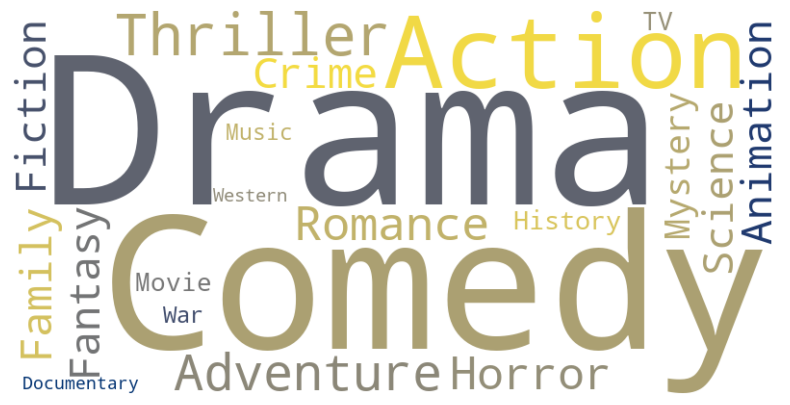

In [128]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_global)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

Clairement, nous pouvons voir que les genres comme Drama, Comedy et Action prévalent dans notre dataset. Qu'en est-il réellement? Nous allons le voir grâce à l'histogramme de l'occurrence des mots

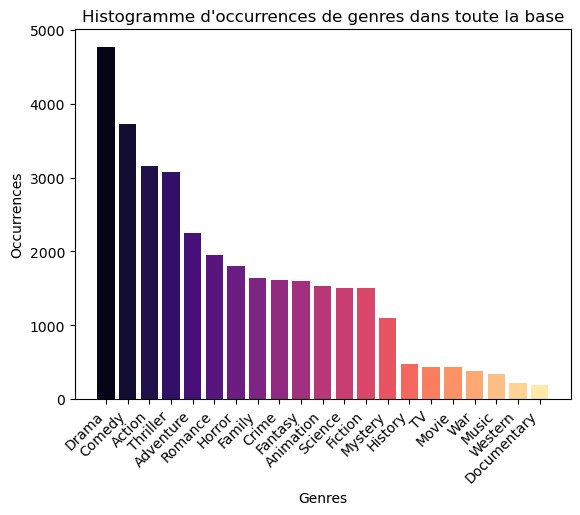

In [129]:
#Pour le bar chart 
genre_counts = Counter(genres_global.split())

# Créer un graphique à barres
genres = list(genre_counts.keys())
occurrences = list(genre_counts.values())
#trier par ordre decroissant pour plus de lisibilité 
genres, occurrences = zip(*sorted(zip(genres, occurrences), key=lambda x: x[1], reverse=True))
#Rajouter des belles couleurs et faire un gradient 
colors = sns.color_palette("magma", n_colors=len(genres))

#afficher le graphe

plt.bar(genres, occurrences, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrences de genres dans toute la base")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Parmi les films nominés dans les compétitions cinématographiques mainstream (Oscar, César)**
Nous allons réproduire cette expérience ensuite en regardant de près les mêmes informations mais pour les films nominés pour les compétitions telles que Oscar et César. 

In [138]:
base1['genres_mains'] = base1.apply(lambda row: row['genres_list'] if row['Award_mains'] == 1 else None, axis=1)

mains = base1[base1['genres_mains'].notnull()]

mains['genres_mains_str'] = mains['genres_mains'].apply(lambda x: ' '.join(ast.literal_eval(x)))

# Convertir la colonne 'genres_str' en chaîne de caractères
mains['genres_mains_str'] = mains['genres_mains_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_mains= ' '.join(mains['genres_mains_str'] )


/tmp/ipykernel_7704/1682111483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mains['genres_mains_str'] = mains['genres_mains'].apply(lambda x: ' '.join(ast.literal_eval(x)))
/tmp/ipykernel_7704/1682111483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mains['genres_mains_str'] = mains['genres_mains_str'].astype(str)


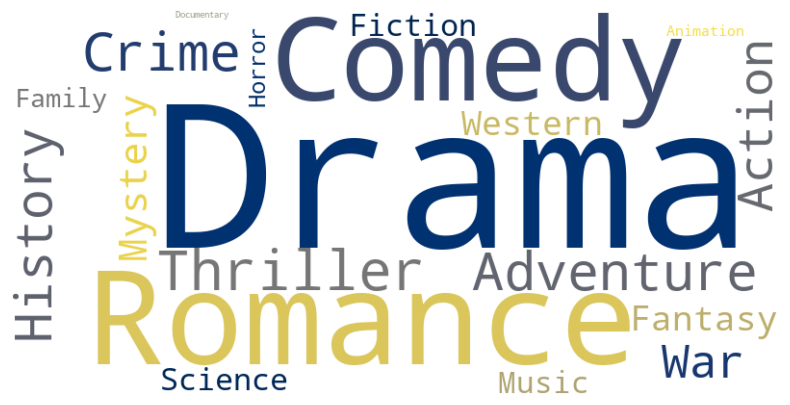

In [139]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_mains)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

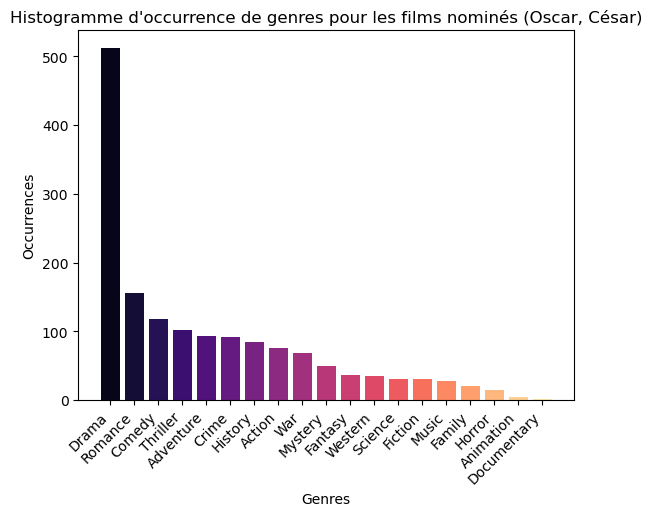

In [143]:
#Histogramme 
genre_mains_ct = Counter(genres_mains.split())

# Créer un graphique à barres
genres_m = list(genre_mains_ct.keys())
occurrences_m = list(genre_mains_ct.values())
#trier par ordre decroissant pour plus de lisibilité 
genres_m, occurrences_m = zip(*sorted(zip(genres_m, occurrences_m), key=lambda x: x[1], reverse=True))
#Rajouter des belles couleurs et faire un gradient 
colors = sns.color_palette("magma", n_colors=len(genres_m))

#afficher le graphe

plt.bar(genres_m, occurrences_m, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrence de genres pour les films nominés (Oscar, César)")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Parmi les films nominés dans les festivals cinématographiques (Cannes, Venise)**
Nous allons également analyser et comparer l'occurrence des genres de cinéma parmi les films nominés dans les compétitions telles que le Festival de Cannes et le Festival de Venise.

In [141]:
base1['genres_fest'] = base1.apply(lambda row: row['genres_list'] if row['Award_fest'] == 1 else None, axis=1)

fest = base1[base1['genres_fest'].notnull()]

fest['genres_fest_str'] = fest['genres_fest'].apply(lambda x: ' '.join(ast.literal_eval(x)))

# Convertir la colonne 'genres_str' en chaîne de caractères
fest['genres_fest_str'] = fest['genres_fest_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_fest= ' '.join(fest['genres_fest_str'] )


/tmp/ipykernel_7704/357739241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fest['genres_fest_str'] = fest['genres_fest'].apply(lambda x: ' '.join(ast.literal_eval(x)))
/tmp/ipykernel_7704/357739241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fest['genres_fest_str'] = fest['genres_fest_str'].astype(str)


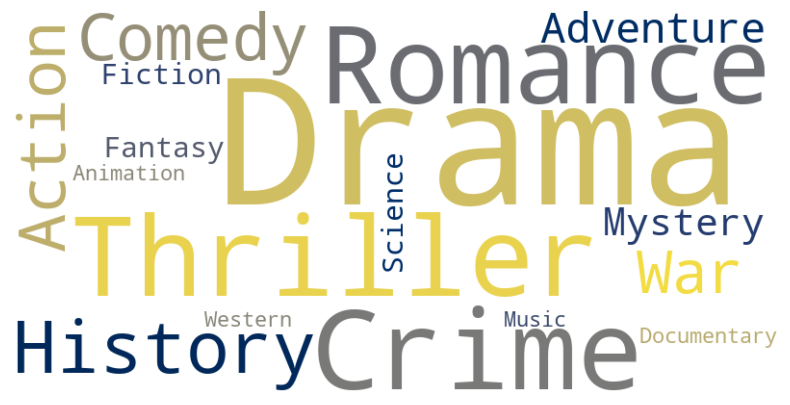

In [142]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_fest)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

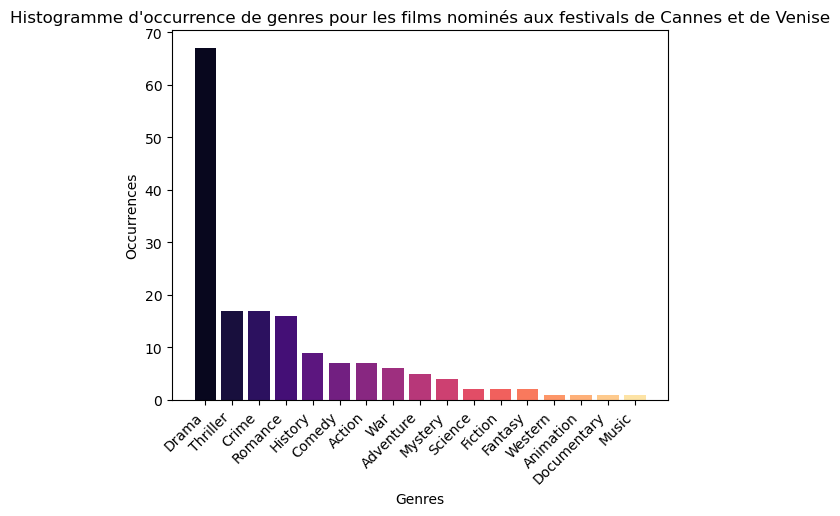

In [144]:
#Histogramme 
genre_fest_ct = Counter(genres_fest.split())

# Créer un graphique à barres
genres_f = list(genre_fest_ct.keys())
occurrences_f = list(genre_fest_ct.values())
#trier par ordre decroissant pour plus de lisibilité 
genres_f, occurrences_f = zip(*sorted(zip(genres_f, occurrences_f), key=lambda x: x[1], reverse=True))
#Rajouter des belles couleurs et faire un gradient 
colors = sns.color_palette("magma", n_colors=len(genres_f))

#afficher le graphe

plt.bar(genres_f, occurrences_f, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrence de genres pour les films nominés aux festivals de Cannes et de Venise")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Conclusions et limites** 

Nous pouvons 

Notons aussi que notre analyse peut comporter des biais - en effet, nous n'avons pas étudié toutes les catégories dans lesquelles les films pourraient être nominés, et le nombre de films présents à la fois dans notre base récupérée grâce à l'API et grâce au scrapping reste faible, de l'ordre de 700 toute nomination confondue. Il est donc difficile à le généraliser à toutes les nominations ou compétitions cinématographique, mais étant donné les contraintes techniques pour notre cas (la contrainte de temps, et la difficulté de nettoyage des données scrappées sur Wikipédia), ces résultats restent intéressants pour notre analyse et la construction de l'algorithme de recommendation. 
